<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Expectation_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectation Maximization (EM) algorithm for maximum likelihood estimation

Problem motivation: Consider bids for a share. You are aware that there are two groups bidding for the share and that their evaluations are different, but you can observe only the noisy bid values, not knowing from which group a bid orginated. Your objective is to estimate the two different evaluations (knowing the larger evaluation might fetch a seller better rates for his shares). If we ignore the fact that there are two different evaluations that are driving the bids, then a naive estimate of the evaluation would be the empirical mean of all the bids. Such an estimate would be lower than the higher evaluation. 


In the above example, when we observe a bid, we are not sure from which group the bid originated. The group identity of the bid is hidden. It is in this context that expectation maximization algorithm (EM) helps to estimate the maximum likelihood estimates of the underlying parameters in the presence of hidden or latent variables.

Expectation Maximization (EM) is an iterative algorithm to obtain the maximum likelihood estimate given a set of observations. Let us have quick overview of the EM algorithm.

Let $Y^n = (Y_1, Y_2, ..., Y_n )$ be a set of observations. Let $\theta$ denote the parameter we want to optimize to maximize the likelihood. The maximum likelihood estimate $\theta^*$ is defind as: 

$\theta^* = \arg \max_\theta p(Y^n| \theta) = \arg \max _\theta \log(P(Y^n | \theta)) =: \arg \max _\theta L(\theta) .$



In many cases it might not be easy to find $\theta^*$ directly from the above expression. This is particularly the case when there are unobservable random variables that influence the sample generation. In the above share bidding example, the group identity of the bid is a hidden random variable and knowledge of that random variable simplifies likelihood computation.  EM algorithm proposes an iterative procedure,  that at each instance updates its estimates of the hidden random variables and that of the parameters of interest, and provides better estimates after each iteration and hence guarantees at least a locally optimum solution. 

Let us try to derive the EM algorithm.

\begin{align}
 L(\theta) &:= \log (P(Y^n | \theta))\\
 & = \log \left(\sum_{z \in \mathcal{Z}} P(Y^n, Z | \theta)\right)\\
 &=\log \left(\sum_{z \in \mathcal{Z}} Q(Z,Y^n,\theta) \frac{P(Y^n, Z | \theta)}{Q(Z,Y^n,\theta)} \right) \\
 &\ge \sum_{z \in \mathcal{Z}} Q(Z,Y^n,\theta) \log \left(\frac{P(Y^n, Z | \theta)}{Q(Z,Y^n,\theta)} \right), 
\end{align} 

where $Z$ is the latent variable or the hidden variable. $Q(Z,Y^n,\theta)$ is a pmf on $\mathcal{Z}.$ In particular let us set $Q(Z,Y^n,\theta) = P(Z | Y^n, \theta)$.

Let us define $$l(\theta, \theta') := \sum_{z \in \mathcal{Z}} P(Z | Y^n, \theta') \log \left(\frac{P(Y^n, Z | \theta)}{P(Z | Y^n, \theta')} \right).$$ Note that $l(\theta,\theta) = L(\theta).$

EM -Algorithm:

Initialize $\theta_0$ to a random value. For $n \ge 1$ repeat till convergence of $l(\theta_n, \theta_{n-1})$
*   E-Step : compute $P(Z | Y^n, \theta_{n-1})$ 
*   M-Step : $\theta_n := \arg \max_\theta l(\theta, \theta_{n-1})$
*   $n=n+1$

Properties: 

 $ L(\theta_n) = l(\theta_n, \theta_n)$ is a monotonically increasing sequence and hence convereges. This is true because the following chain of inequalities hold:
 
 $L(\theta_n) = l(\theta_n, \theta_n) \ge l(\theta_n, \theta_{n-1}) \ge l(\theta_{n-1}, \theta_{n-1}) = L(\theta_{n-1}).$

##Case 1.1 - Mixture of univariate Gaussian random variables

To begin, let us consider a simple case of samples being generated from two uni-variate gaussian distributions with same variance, but different means. 

Let
$$ Y = 1_{\{C = 0\}} X_1 + 1_{\{C = 1\}} X_2, $$
where $C \sim Ber(p),$ $X_1$, $X_2$  are univariate Gaussian random variables with unknown means $\mu_1$ and $\mu_2$  and common variance $\sigma^2$. To begin, let us assume that the variance is known.

Given samples from $Y$, the aim is to find the maximum likelihood estimates of $\mu_1$ and $\mu_2$. Here $C$ is the latent variable or the hidden variable.

Let us derive the required expressions for EM algorithm for this particular problem. The likelihhod function is defined as

\begin{align}
 L(\mu_1, \mu_2) &= \log (P(Y^n | \mu_1, \mu_2))\\
 & = \sum_{i = 1}^{n}  \log (P(Y_i | \mu_1, \mu_2)) \\
 & = \sum_{i = 1}^{n}  \log \left( \sum_{c = 0,1}P(Y_i, C_i = c | \mu_1, \mu_2)\right) \\
 & \ge \sum_{i = 1}^{n} \sum_{c = 0,1} P( C_i = c | Y_i, \mu_1, \mu_2) \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2)}{P( C_i = c | Y_i, \mu_1, \mu_2)}\right).
\end{align}

The lower bound for the likelihood function is defined as

\begin{align}
l(\mu_1,\mu_2, \mu_1',\mu_2') & = \sum_{i = 1}^{n} \sum_{c = 0,1} P( C_i = c | Y_i, \mu_1', \mu_2') \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2)}{P( C_i = c | Y_i, \mu_1', \mu_2')}\right).
\end{align}

Let us now obtain the update rules for the E-Step and the M-Step.

E-Step: 
\begin{align}
P( C_i = c | Y_i, \mu_1', \mu_2') &= \frac{P(Y_i | C_i = c, \mu_1', \mu_2')  P(C_i = c | \mu_1' \mu_2')}{P(Y_i | \mu_1', \mu_2')}\\
&= \frac{P(Y_i | C_i = c, \mu_1', \mu_2')  P(C_i = c )}{\sum_{c' = 0,1}P(Y_i | C_i = c', \mu_1', \mu_2')  P(C_i = c' )},
\end{align}

where in the second equality, we have used the assumption that $C_i$ is independent of $\mu_1'$, $\mu_2'$.

From the Gaussian assumption on the sample distribution, we have 
\begin{align}
P(Y_i | C_i = 0, \mu_1', \mu_2') &= \frac{1}{\sqrt{2\pi} \sigma} e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}}
\end{align}

\begin{align}
P( C_i = 0 | Y_i, \mu_1', \mu_2') &= \frac{P(Y_i | C_i = 0, \mu_1', \mu_2')  P(C_i = 0 )}{\sum_{c' = 0,1}P(Y_i | C_i = c', \mu_1', \mu_2')  P(C_i = c' )}\\
&=\frac{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma^2}} (1-p)}{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma^2}} (p)}
\end{align}

Let us define
\begin{align}
w_i^0&:=\frac{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma^2}} (1-p)}{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma^2}} (p)}\\
w_i^1&:=\frac{e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma^2}} (p)}{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma^2}} (p)}\\
\end{align}

Thus computing $w_i^c$ for $c = 0,1$ and $i = 0...n$ for the E-Step.

M-Step:

For the M-Step, we need to determine the parameters $\mu_1$ and $\mu_2$ that maximises the lowerbound function $l(\mu_1,\mu_2, \mu_1',\mu_2').$

Using the definitions of $w_i^c$ developed above,, we can re-write the  lowerbound function $l(\mu_1,\mu_2, \mu_1',\mu_2')$ as
\begin{align}
l(\mu_1,\mu_2, \mu_1',\mu_2') & = \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2)}{w_i^c}\right).
\end{align}

The objective of the M-Step is to compute
\begin{align}
(\mu_1, \mu_2) &= \arg \max_{\mu_1, \mu_2} l(\mu_1,\mu_2, \mu_1',\mu_2')\\
 &= \arg \max_{\mu_1, \mu_2}  \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2)}{w_i^c}\right)\\
  &= \arg \max_{\mu_1, \mu_2}  \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \left(\log \left( {P(Y_i | C_i = c, \mu_1, \mu_2)} + \log (P(C_i=c | \mu_1, \mu_2))-\log (w_i^c)\right)\right)\\
  &= \arg \max_{\mu_1, \mu_2}  \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \log \left( {P(Y_i | C_i = c, \mu_1, \mu_2)} \right)\\
  & = \arg \max_{\mu_1, \mu_2}  \sum_{i = 1}^{n} - w_i^0 (Y_i - \mu_1)^2 - w_i^1 (Y_i - \mu_2)^2
\end{align}

where the second last equality holds as the second and third terms are not dependent on $\mu_1$ and $\mu_2$ (we have used the fact that $C_i$ is generated independently of $\mu_1$ and $\mu_2$) and do not contribute to the optimization problem. The last equality is obtained by substituting the expressions for $P(Y_i | C_i = c, \mu_1, \mu_2)$ in the previous equation, and then removing terms that do not contribute to the optimization problem. 

To obtain the optimal $\mu_1$ and $\mu_2$, we can differentiate the above equation with respect to $\mu_1$ and $\mu_2$ and equate to zero.

The solution we thus obtain is
\begin{align}
\mu_1 &= \frac{\sum_{i = 1}^{n}  w_i^0 Y_i}{\sum_{i = 1}^{n}  w_i^0}, \text{ and}\\
\mu_2 &= \frac{\sum_{i = 1}^{n}  w_i^1 Y_i}{\sum_{i = 1}^{n}  w_i^1}
\end{align}

We now have all the ingredients to compute the E-Step and the M-Step. In summary, the EM algorithm would be:


Initialize $\mu_1 = 0$, $\mu_2 = 20$ (random values). Repeat till convergence of $L(\mu_1,\mu_2)$
*   E-Step : Compute 
\begin{align}
w_i^0&:=\frac{e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}} (1-p)}{e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2)^2}{2 \sigma^2}} (p)}\\
w_i^1&:=\frac{e^{ \frac{-(Y_i - \mu_2)^2}{2 \sigma^2}} (p)}{e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2)^2}{2 \sigma^2}} (p)}\\
\end{align}
*   M-Step : Update $\mu_1$ and $\mu_2$ as

\begin{align}
\mu_1 &= \frac{\sum_{i = 1}^{n}  w_i^0 Y_i}{\sum_{i = 1}^{n}  w_i^0}, \text{ and}\\
\mu_2 &= \frac{\sum_{i = 1}^{n}  w_i^1 Y_i}{\sum_{i = 1}^{n}  w_i^1}
\end{align}

Let us now apply the above derived algorithm to the problem under consideration.

Number of Y_1 samples = 1411. Number of Y_2 samples = 589


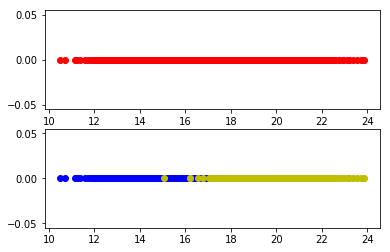

(array([ 1.,  0.,  2.,  2., 10., 17., 23., 42., 64., 63., 68., 77., 63.,
        55., 42., 30., 16.,  6.,  4.,  4.]),
 array([15.05822527, 15.4991149 , 15.94000453, 16.38089416, 16.82178379,
        17.26267342, 17.70356305, 18.14445268, 18.58534231, 19.02623195,
        19.46712158, 19.90801121, 20.34890084, 20.78979047, 21.2306801 ,
        21.67156973, 22.11245936, 22.55334899, 22.99423862, 23.43512825,
        23.87601788]),
 <a list of 20 Patch objects>)

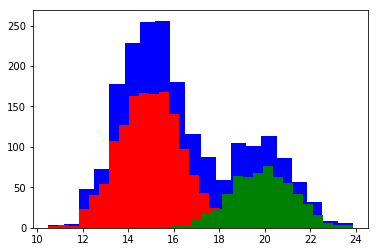

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

num_samples = 2000
mu_1 = 15
mu_2 = 20
var = 2
p = 0.3

# Generation of samples

C = np.random.rand(num_samples,1)
C[C>p]  = 0
C[C!=0] = 1
X_1 = math.sqrt(var)* (np.random.randn(num_samples,1))+mu_1
X_2 = math.sqrt(var)* (np.random.randn(num_samples,1))+mu_2
Y = (C==0)*X_1 + (C==1)*X_2

Y_1 = X_1[C==0]
Y_2 = X_2[C==1]

print("Number of Y_1 samples = %d. Number of Y_2 samples = %d"  %(Y_1.size, Y_2.size))

plt.figure(1)
plt.subplot(211)
plt.plot(Y,np.zeros((Y.size,1)),'ro')
plt.subplot(212)
plt.plot(Y_1,np.zeros((Y_1.size,1)),'bo')
plt.plot(Y_2,np.zeros((Y_2.size,1)),'yo')
plt.show()

plt.figure()
plt.hist(Y,bins=20,color='b')
plt.hist(Y_1,bins=20,color='r')
plt.hist(Y_2,bins=20,color='g')

2
mu_1_est = 14.960577, mu_2_est = 19.883121


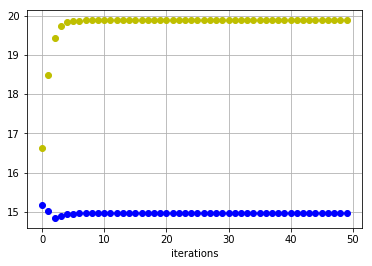

In [2]:
num_iterations = 50
mu_1_est = 5
mu_2_est = 5.5
w_est = np.zeros((Y.size,2))
print(w_est[:][0].size)
for iter_count in range(num_iterations):
  #E-Step
  
    w_est[:,[0]] = Y-mu_1_est 
    w_est[:,[1]] = Y-mu_2_est 
    w_est[:,[0]] = np.exp(-np.divide(np.square(w_est[:,[0]]),2*var))*(1-p)
    w_est[:,[1]] = np.exp(-np.divide(np.square(w_est[:,[1]]),2*var))*(p)
    w_est[:,[0]] = np.divide(w_est[:,[0]], w_est[:,[0]]+w_est[:,[1]])
    w_est[:,[1]] = 1- w_est[:,[0]]
  # M-Step
    mu_1_est = np.divide(np.sum(w_est[:,[0]]*Y),np.sum(w_est[:,[0]]))
    mu_2_est = np.divide(np.sum(w_est[:,[1]]*Y),np.sum(w_est[:,[1]]))
    plt.figure(2)
    plt.plot(iter_count,mu_1_est,'bo')
    plt.plot(iter_count,mu_2_est,'yo')
    
print("mu_1_est = %f, mu_2_est = %f" %(mu_1_est,mu_2_est))
plt.xlabel('iterations')
plt.grid(True)
plt.show()



  

##Case -1.2 Mixture of Univariate Gaussians with unknown variance

Recollect that in the earlier exercise, we had assumed knowledge of the variance. Let us now consider the case when $X_1$ and $X_2$ have same but unknown variance. We will now derive the update rules for the new setting. We will observe that the update rules are same as before, with an additional update rule for the estimate of variance. Let us now look a closer look at the derivation.

The lowerbound function on the likelihood can be defined as

\begin{align}
l(\mu_1,\mu_2, \sigma^2, \mu_1',\mu_2', \sigma'^2) & = \sum_{i = 1}^{n} \sum_{c = 0,1} P( C_i = c | Y_i, \mu_1', \mu_2',\sigma'^2) \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2,\sigma^2)}{P( C_i = c | Y_i, \mu_1', \mu_2',\sigma'^2)}\right).
\end{align}

Let us now obtain the update rules for the E-Step and the M-Step.

E-Step: 
\begin{align}
P( C_i = c | Y_i, \mu_1', \mu_2',\sigma'^2) &= \frac{P(Y_i | C_i = c, \mu_1', \mu_2',\sigma'^2)  P(C_i = c | \mu_1' \mu_2',\sigma'^2)}{P(Y_i | \mu_1', \mu_2',\sigma'^2)}\\
&= \frac{P(Y_i | C_i = c, \mu_1', \mu_2',\sigma'^2)  P(C_i = c )}{\sum_{c' = 0,1}P(Y_i | C_i = c', \mu_1', \mu_2',\sigma'^2)  P(C_i = c' )},
\end{align}

where in the second equality, we have used the assumption that $C_i$ is independent of $\mu_1'$, $\mu_2',\sigma'^2$.

From the Gaussian assumption on the sample distribution, we have 
\begin{align}
P(Y_i | C_i = 0, \mu_1', \mu_2',\sigma'^2) &= \frac{1}{\sqrt{2\pi} \sigma} e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma'^2}}.
\end{align}

\begin{align}
P( C_i = 0 | Y_i, \mu_1', \mu_2',\sigma'^2) &= \frac{P(Y_i | C_i = 0, \mu_1', \mu_2',\sigma'^2)  P(C_i = 0 )}{\sum_{c' = 0,1}P(Y_i | C_i = c', \mu_1', \mu_2',\sigma'^2)  P(C_i = c' )}\\
&=\frac{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma'^2}} (1-p)}{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma'^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma'^2}} (p)}
\end{align}

Let us define
\begin{align}
w_i^0&:=\frac{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma'^2}} (1-p)}{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma'^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma'^2}} (p)}\\
w_i^1&:=\frac{e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma'^2}} (p)}{e^{ \frac{-(Y_i - \mu_1')^2}{2 \sigma'^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2')^2}{2 \sigma'^2}} (p)}\\
\end{align}

Thus the computation for the E-Step remains similar with the variance term replaced by the current estimate of the variance.

M-Step:

For the M-Step, we need to determine the parameters $\mu_1$, $\mu_2$ and $\sigma^2$ that maximises the lowerbound function $l(\mu_1,\mu_2, \sigma^2, \mu_1',\mu_2',\sigma'^2).$

Using the definitions of $w_i^c$ developed above,, we can re-write the  lowerbound function $l(\mu_1,\mu_2, \sigma^2, \mu_1',\mu_2',\sigma'^2)$ as
\begin{align}
l(\mu_1,\mu_2, \sigma^2, \mu_1',\mu_2',\sigma'^2) & = \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2,\sigma^2)}{w_i^c}\right).
\end{align}

The objective of the M-Step is to compute
\begin{align}
(\mu_1, \mu_2,\sigma^2) &= \arg \max_{\mu_1, \mu_2,\sigma^2} l(\mu_1,\mu_2, \sigma^2, \mu_1',\mu_2',\sigma'^2)\\
 &= \arg \max_{\mu_1, \mu_2,\sigma^2} \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \log \left( \frac{P(Y_i, C_i = c | \mu_1, \mu_2,\sigma^2)}{w_i^c}\right)\\
  &=\arg \max_{\mu_1, \mu_2,\sigma^2}  \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \left(\log \left( {P(Y_i | C_i = c, \mu_1, \mu_2,\sigma^2)} + \log (P(C_i=c | \mu_1, \mu_2,\sigma^2))-\log (w_i^c)\right)\right)\\
  &= \arg \max_{\mu_1, \mu_2,\sigma^2}  \sum_{i = 1}^{n} \sum_{c = 0,1} w_i^c \log \left( {P(Y_i | C_i = c, \mu_1, \mu_2,\sigma^2)} \right)\\
  & = \arg \max_{\mu_1, \mu_2,\sigma^2}  \sum_{i = 1}^{n} w_i^0 \left( \frac{-(Y_i - \mu_1)^2}{2 \sigma^2} - \frac{1}{2} \log(2 \pi \sigma^2)\right) + w_i^1 \left( \frac{-(Y_i - \mu_2)^2}{2 \sigma^2} - \frac{1}{2} \log(2 \pi \sigma^2)\right)
\end{align}

where the second last equality holds as the second and third terms are not dependent on $\mu_1$, $\mu_2$ and $\sigma^2$ (we have used the fact that $C_i$ is generated independently of $\mu_1$, $\mu_2$, $\sigma^2$) and do not contribute to the optimization problem. The last equality is obtained by substituting the expressions for $P(Y_i | C_i = c, \mu_1, \mu_2, \sigma^2)$ in the previous equation, and then removing terms that do not contribute to the optimization problem. 

To obtain the optimal $\mu_1$ and $\mu_2$, we can differentiate the above equation with respect to $\mu_1$ and $\mu_2$ and equate to zero.

The solution we thus obtain is
\begin{align}
\mu_1 &= \frac{\sum_{i = 1}^{n}  w_i^0 Y_i}{\sum_{i = 1}^{n}  w_i^0}, \text{ and}\\
\mu_2 &= \frac{\sum_{i = 1}^{n}  w_i^1 Y_i}{\sum_{i = 1}^{n}  w_i^1}
\end{align}

To obtain the optimum $\sigma^2$ we need to differentiate with respect to $\sigma^2$ and set it to zero.

\begin{align}
\frac{\partial l(\mu_1,\mu_2, \sigma^2, \mu_1',\mu_2',\sigma'^2)}{\partial \sigma^2} &= \sum_{i = 1}^{n} w_i^0 \left( \frac{(Y_i - \mu_1)^2}{2 \sigma^4} - \frac{1}{2\sigma^2} \right) + w_i^1 \left( \frac{(Y_i - \mu_2)^2}{2 \sigma^4} - \frac{1}{2\sigma^2} \right).
\end{align}

Equating the partial derivative to zero and solving for $\sigma^2$, we obtain
\begin{align}
\sigma^2 = \frac{1}{n} \sum_{i = 1}^{n} w_i^0 {(Y_i - \mu_1)^2} + w_i^1 {(Y_i - \mu_2)^2}
\end{align}

We now have all the ingredients to compute the E-Step and the M-Step. In summary, the EM algorithm would be:


Initialize $\mu_1 = 0$, $\mu_2 = 20$ (random values). Repeat till convergence of $L(\mu_1,\mu_2)$
*   E-Step : Compute 
\begin{align}
w_i^0&:=\frac{e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}} (1-p)}{e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2)^2}{2 \sigma^2}} (p)}\\
w_i^1&:=\frac{e^{ \frac{-(Y_i - \mu_2)^2}{2 \sigma^2}} (p)}{e^{ \frac{-(Y_i - \mu_1)^2}{2 \sigma^2}} (1-p) + e^{ \frac{-(Y_i - \mu_2)^2}{2 \sigma^2}} (p)}\\
\end{align}
*   M-Step : Update $\mu_1$ and $\mu_2$ as

\begin{align}
\mu_1 &= \frac{\sum_{i = 1}^{n}  w_i^0 Y_i}{\sum_{i = 1}^{n}  w_i^0}, \text{ and}\\
\mu_2 &= \frac{\sum_{i = 1}^{n}  w_i^1 Y_i}{\sum_{i = 1}^{n}  w_i^1}\\
\sigma^2 &= \frac{1}{n} \sum_{i = 1}^{n} w_i^0 {(Y_i - \mu_1)^2} + w_i^1 {(Y_i - \mu_2)^2}
\end{align}

2


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


mu_1_est = 14.952719, mu_2_est = 19.885218, var_est = 1.885232


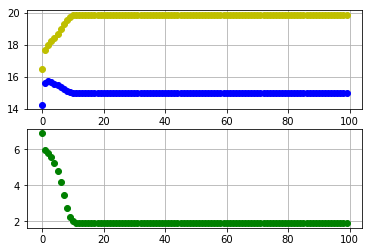

In [3]:
num_iterations = 100
mu_1_est = 5.0
mu_2_est = 5.5
var_est = 1
w_est = np.zeros((Y.size,2))
print(w_est[:][0].size)
for iter_count in range(num_iterations):
  #E-Step
  
    w_est[:,[0]] = Y-mu_1_est 
    w_est[:,[1]] = Y-mu_2_est 
    w_est[:,[0]] = np.exp(-np.divide(np.square(w_est[:,[0]]),2*var_est))*(1-p)
    w_est[:,[1]] = np.exp(-np.divide(np.square(w_est[:,[1]]),2*var_est))*(p)
    w_est[:,[0]] = np.divide(w_est[:,[0]], w_est[:,[0]]+w_est[:,[1]])
    w_est[:,[1]] = 1- w_est[:,[0]]
  # M-Step
    mu_1_est = np.divide(np.sum(w_est[:,[0]]*Y),np.sum(w_est[:,[0]]))
    mu_2_est = np.divide(np.sum(w_est[:,[1]]*Y),np.sum(w_est[:,[1]]))
    var_est = np.sum(w_est[:,[0]]*np.square(Y-mu_1_est) + w_est[:,[1]] * np.square(Y-mu_2_est))/(Y.size)
    plt.figure(2)
    plt.subplot(211)
    plt.plot(iter_count,mu_1_est,'bo')
    plt.plot(iter_count,mu_2_est,'yo')
    plt.subplot(212)
    plt.plot(iter_count,var_est,'go')

print("mu_1_est = %f, mu_2_est = %f, var_est = %f" %(mu_1_est,mu_2_est,var_est))    

plt.subplot(211)
plt.xlabel('iterations')
plt.grid(True)
plt.subplot(212)
#plt.xlabel('iterations')
plt.grid(True)
plt.show()


##Case - 3 Mixture of univariate Gaussians with unknown $p$ for the Bernoulli random variable.

Exercise: Show that the update rule for $p$ in the M-Step is
$$p = \frac{1}{m}\sum_{i=1}^m w_i^1$$

2


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


mu_1_est = 14.955330, mu_2_est = 19.890379, var_est = 1.886743, p_est = 0.296272


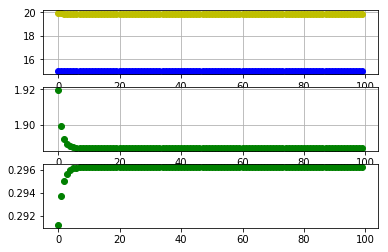

In [4]:
num_iterations = 100
mu_1_est = mu_1 #5.0
mu_2_est = mu_2 #5.5
var_est = var #2 
p_est = p #0.1

w_est = np.zeros((Y.size,2))
print(w_est[:][0].size)
for iter_count in range(num_iterations):
  #E-Step
  
    w_est[:,[0]] = Y-mu_1_est 
    w_est[:,[1]] = Y-mu_2_est 
    w_est[:,[0]] = np.exp(-np.divide(np.square(w_est[:,[0]]),2*var_est))*(1-p_est)
    w_est[:,[1]] = np.exp(-np.divide(np.square(w_est[:,[1]]),2*var_est))*(p_est)
    w_est[:,[0]] = np.divide(w_est[:,[0]], w_est[:,[0]]+w_est[:,[1]])
    w_est[:,[1]] = 1- w_est[:,[0]]
  # M-Step
    mu_1_est = np.divide(np.sum(w_est[:,[0]]*Y),np.sum(w_est[:,[0]]))
    mu_2_est = np.divide(np.sum(w_est[:,[1]]*Y),np.sum(w_est[:,[1]]))
    var_est = np.sum(w_est[:,[0]]*np.square(Y-mu_1_est) + w_est[:,[1]] * np.square(Y-mu_2_est))/(Y.size)
    p_est = np.sum(w_est[:,[1]])/(Y.size)
    
    plt.figure(2)
    plt.subplot(311)
    plt.plot(iter_count,mu_1_est,'bo')
    plt.plot(iter_count,mu_2_est,'yo')
    plt.subplot(312)
    plt.plot(iter_count,var_est,'go')
    plt.subplot(313)
    plt.plot(iter_count,p_est,'go')

print("mu_1_est = %f, mu_2_est = %f, var_est = %f, p_est = %f" %(mu_1_est,mu_2_est,var_est,p_est))    

plt.subplot(311)
plt.xlabel('iterations')
plt.grid(True)
plt.subplot(312)
#plt.xlabel('iterations')
plt.grid(True)
plt.show()

Observations:

* When both variance $\sigma^2$ and Bernoulli parameter $p$ are assumed unknown, then the EM algorithm converges to an incorrect solution, suggesting that the algorithm is getting stuck in a local maxima. 
* If we initialize the paramters in the EM algorithm with the true values, then the algorithm does not deviate from the true parameters, suggesting that the algorithm is converging to a local maxima in other cases.